In [2]:
from ..baseline_models.model import *

ImportError: attempted relative import with no known parent package

In [11]:
import torch
probs = torch.tensor([0.2, 0.5, 0.3])
a = torch.multinomial(probs, 1).item()


print("a", a)

a 1


In [12]:
a = True

b = a.view(-1,1,1)

print(b)

AttributeError: 'bool' object has no attribute 'view'

In [1]:
def test_channel_dataset():
    import h5py
    import numpy as np
    import matplotlib.pyplot as plt
    from sequence_loader import ChannelSequenceDataset

    filename = '../dataset/outputs/umi_standard_8Tx_2Rx.mat'
    with h5py.File(filename, "r") as f:
        print("Top-level keys:", list(f.keys()))
        ds = f["channel_matrix"]
        print("channel_matrix dataset shape:", ds.shape)
        print("channel_matrix dataset dtype:", ds.dtype)

        # Check if dataset has compound dtype (typical for MATLAB complex arrays)
        if ds.dtype.fields is not None and "real" in ds.dtype.fields and "imag" in ds.dtype.fields:
            arr = ds[...]
            real_data = arr["real"]
            imag_data = arr["imag"]
            channel_matrix = real_data + 1j * imag_data
        else:
            # If it's not a compound dataset with 'real'/'imag', try direct conversion
            # (will fail if dtype=void or structured differently)
            channel_matrix = np.array(ds)
            if np.issubdtype(channel_matrix.dtype, np.void):
                raise TypeError("channel_matrix has a void/structured dtype and cannot be directly converted.")

    print("channel_matrix shape:", channel_matrix.shape)
    print("Channel matrix real data", real_data.shape) 
    print("Channel matrix imag data", imag_data.shape)
    print("channel_matrix dtype:", channel_matrix.dtype)
    # dataset = ChannelSequenceDataset(channel_matrix)
    # print(f"Dataset created with {len(dataset)} samples")
    # print(f"Number of users: {dataset.num_users}")
    # print(f"Time samples per user: {dataset.time_length}")


    return dataset

if __name__ == "__main__":
    test_channel_dataset()


Top-level keys: ['#refs#', 'cfg', 'channel_matrix']
channel_matrix dataset shape: (256, 8, 18, 2, 500)
channel_matrix dataset dtype: [('real', '<f4'), ('imag', '<f4')]
channel_matrix shape: (256, 8, 18, 2, 500)
Channel matrix real data (256, 8, 18, 2, 500)
Channel matrix imag data (256, 8, 18, 2, 500)
channel_matrix dtype: complex64


NameError: name 'dataset' is not defined

In [ ]:
(256, 8, 18, 2, 500)

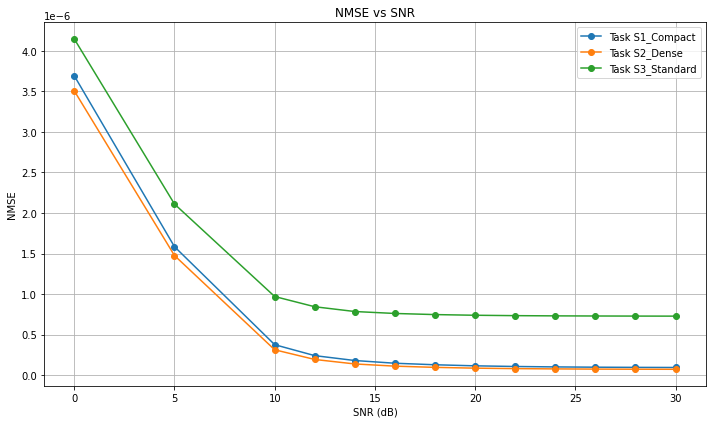

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
csv_path = f"./reservoir_nmse_results.csv"
df = pd.read_csv(csv_path)

# Convert SNR to integer and NMSE to float for proper plotting
df['SNR'] = df['SNR'].astype(int)
df['NMSE'] = df['NMSE'].astype(float)

# Plot
plt.figure(figsize=(10, 6))
for task in df['Task'].unique():
    task_df = df[df['Task'] == task]
    plt.plot(task_df['SNR'], task_df['NMSE'], marker='o', label=f'Task {task}')

plt.xlabel('SNR (dB)')
plt.ylabel('NMSE')
plt.title('NMSE vs SNR')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
